In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

## Clustering:

- K-means: Conceitos básicos, aplicações e métricas de avaliação de cluster
- K-medoids: Conceitos e diferenças com K-means
- DBScan: Introdução e características


### K-means

**Inicialização:** Escolhe-se o número K de clusters e selecionam-se K pontos iniciais como os "centros" (centroides) dos clusters.

**Atribuição:** Cada ponto de dados é atribuído ao cluster cujo centroide está mais próximo, com base na distância (geralmente euclidiana).

**Atualização:** Os centroides dos clusters são recalculados como a média dos pontos atribuídos a cada cluster.

**Convergência:** Repetem-se os passos 2 e 3 até que os centroides não mudem significativamente, indicando que o algoritmo convergiu.

**Finalização:** O resultado são K clusters de pontos, com cada ponto pertencendo ao cluster cujo centroide está mais próximo.

O K-means é iterativo e busca minimizar a soma das distâncias quadradas entre os pontos e seus centroides de cluster correspondentes.

In [2]:
# Carregar dataset
iris = sns.load_dataset('iris')
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [3]:
# Separar variáveis dependentes e independentes
X = iris.drop('species', axis=1)
y = iris['species']

In [4]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(X)
# Prevendo os clusters
labels = kmeans.predict(X)
# Criando uma tabela de contingência
ct = pd.crosstab(y, labels, rownames=['True Species'], colnames=['Predicted Clusters'])

print(ct)

C:\Users\gabri\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\gabri\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Predicted Clusters   0   1   2
True Species                  
setosa              50   0   0
versicolor           0   2  48
virginica            0  36  14


### n_clusters:

- Número de grupos desejados.
### init:

- Método para inicializar os centroides ('k-means++', 'random', ou array).
### n_init:

- Número de inicializações diferentes a serem tentadas.
### max_iter:

- Máximo de iterações para otimizar os centroides.
### tol:

- Tolerância para a convergência.
### random_state:

- Semente para geração de números aleatórios, assegura repetibilidade.
### algorithm:

Algoritmo a ser usado ('auto', 'full' ou 'elkan').

### K-medoids

### Como Funciona K-medoids:

1.  Inicialização:

    -   Escolha �K pontos de dados como os medoides iniciais (os "centros" dos clusters).
2.  Atribuição:

    -   Atribua cada ponto de dados ao medoide mais próximo, com base em uma medida de dissimilaridade (como a distância euclidiana).
3.  Atualização:

    -   Para cada cluster, selecione um novo medoide como o ponto de dados para o qual a soma das dissimilaridades entre este ponto e todos os outros pontos no cluster é mínima.
4.  Convergência:

    -   Repita os passos 2 e 3 até que os medoides não mudem, indicando que o algoritmo convergiu.
5.  Finalização:

    -   O resultado são �K clusters de pontos, com cada ponto pertencendo ao cluster cujo medoide está mais próximo.

### Parâmetros Principais de K-medoids:

1.  n_clusters:

    -   Número de clusters desejados.
2.  metric:

    -   Medida de dissimilaridade a ser usada (ex: 'euclidean', 'manhattan').
3.  init:

    -   Método para inicializar os medoides ('random', 'heuristic' ou array específico).
4.  max_iter:

    -   Máximo de iterações para otimizar os medoides.
5.  random_state:

    -   Semente para geração de números aleatórios, assegura repetibilidade.

In [5]:
from sklearn_extra.cluster import KMedoids

kmedoids = KMedoids(n_clusters=3, method='pam')

kmedoids.fit(X)

labels = kmedoids.predict(X)

ct=pd.crosstab(y, labels, rownames=['True Species'], colnames=['Predicted Clusters'])

print(ct)

Predicted Clusters   0   1   2
True Species                  
setosa               0  50   0
versicolor          13   0  37
virginica           49   0   1


## DBscan

### Como Funciona DBSCAN:

1.  Seleção de Parâmetros:

    -   Especifique dois parâmetros: �ε (eps), que é o raio da vizinhança de um ponto, e `min_samples`, que é o número mínimo de pontos para formar uma região densa.
2.  Crescimento do Cluster:

    -   Para cada ponto não visitado, defina-o como o ponto atual e verifique se há pelo menos `min_samples` pontos dentro da vizinhança de raio �ε. Se sim, comece um novo cluster em torno desse ponto. Se não, marque o ponto como ruído.
3.  Expansão do Cluster:

    -   Para um novo cluster, adicione todos os pontos dentro da vizinhança de raio �ε do ponto inicial ao cluster. Em seguida, para cada novo ponto no cluster, adicione todos os pontos dentro de uma vizinhança de raio �ε a esse cluster. Repita até que o cluster seja completamente descoberto.
4.  Finalização:

    -   Continue o processo até que todos os pontos tenham sido visitados e atribuídos a um cluster ou marcados como ruído. O resultado são vários clusters de pontos densamente agrupados e pontos de ruído.

### Parâmetros Principais de DBSCAN:

1.  eps:

    -   O raio da vizinhança de cada ponto.
2.  min_samples:

    -   O número mínimo de pontos (incluindo o ponto em si) para formar uma região densa.
3.  metric:

    -   A métrica de distância a ser usada para calcular as distâncias entre os pontos (ex: 'euclidean', 'manhattan').
4.  algorithm:

    -   O algoritmo a ser usado para encontrar vizinhos ('auto', 'ball_tree', 'kd_tree', 'brute').
5.  n_jobs:

    -   O número de jobs a serem usados para a computação. -1 significa usar todos os processadores.

In [6]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=4)

labels=dbscan.fit_predict(X)

ct=pd.crosstab(y, labels, rownames=['True Species'], colnames=['Predicted Clusters'])

print(ct)

Predicted Clusters  -1   0   1   2
True Species                      
setosa               1  49   0   0
versicolor           2   0  44   4
virginica           10   0  40   0


Embora o conjunto de dados Iris seja frequentemente utilizado em tarefas de aprendizado supervisionado, dada a presença de rótulos de espécies claramente definidos, estamos optando por uma abordagem diferente neste contexto. Aqui, vamos explorar técnicas de aprendizado não supervisionado, como clustering, para aprender como esses algoritmos funcionam na prática.

O ideal, em circunstâncias normais, seria aplicar um modelo de aprendizado supervisionado, já que possuímos as "chaves" em termos das espécies reais das flores Iris. Isso nos permitiria treinar um modelo para aprender explicitamente a mapear as características das flores às suas respectivas espécies.

Contudo, estamos utilizando uma abordagem não supervisionada para investigar um questionamento interessante: será que, sem qualquer conhecimento prévio das etiquetas das espécies, um algoritmo não supervisionado conseguiria identificar grupos de flores que correspondem de perto às espécies reais? Em outras palavras, queremos ver se o algoritmo não supervisionado é capaz de "descobrir" as espécies por si só, com base apenas nas características das flores, e comparar esses grupos descobertos com as espécies reais que servem como nossas chaves.

Isso é uma experiência didática e ilustrativa, que nos ajuda a entender o poder e as limitações dos métodos de aprendizado não supervisionado e como eles podem (ou não) coincidir com categorias pré-definidas em um conjunto de dados.



## Feature Selection:

- Técnicas de ordenação de features: correlação, Mutual Information, Information value, etc.
- Regularização L1
- Boruta: introdução e aplicação

1.  PassengerId:

    -   Um identificador único para cada passageiro.
2.  Survived:

    -   Indica se o passageiro sobreviveu ou não ao desastre.
    -   0 = Não sobreviveu, 1 = Sobreviveu.
3.  Pclass:

    -   Classe do bilhete do passageiro.
    -   1 = Primeira classe, 2 = Segunda classe, 3 = Terceira classe.
    -   É uma representação do status socioeconômico dos passageiros.
4.  Name:

    -   Nome completo do passageiro.
5.  Sex:

    -   Sexo do passageiro.
    -   Valores típicos: 'male', 'female'.
6.  Age:

    -   Idade do passageiro em anos.
7.  SibSp:

    -   Número de irmãos e cônjuges do passageiro a bordo do Titanic.
8.  Parch:

    -   Número de pais e filhos do passageiro a bordo do Titanic.
9.  Ticket:

    -   Número do bilhete do passageiro.
10. Fare:

    -   Tarifa que o passageiro pagou pelo bilhete.
11. Cabin:

    -   Número da cabine do passageiro.
12. Embarked:

    -   Porto em que o passageiro embarcou no Titanic.
    -   C representa Cherbourg; Q representa Queenstown; S representa Southampton.

In [7]:
titanic=sns.load_dataset('titanic')

In [8]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [9]:
titanic=titanic.drop(['deck','alive'], axis=1)

In [10]:
titanic=titanic.dropna()

## Utilizando LASSO

In [11]:
from sklearn.preprocessing import StandardScaler

titanic=pd.get_dummies(titanic, drop_first=True)

X = titanic.drop('survived', axis=1)

y=titanic['survived']

scaler=StandardScaler()
X_scaled = scaler.fit_transform(X)
from sklearn.linear_model import LassoCV

# Usar LassoCV para encontrar o melhor alpha através de validação cruzada
lasso_cv = LassoCV(alphas=[0.001, 0.01, 0.1, 1, 10, 100], cv=5)
lasso_cv.fit(X_scaled, y)

# Mostrar o alpha que foi escolhido
print("Melhor valor de alpha encontrado:", lasso_cv.alpha_)

# Mostrar os coeficientes para esse alpha
coef_cv = pd.Series(lasso_cv.coef_, index=X.columns)
print(coef_cv)

# Features com coeficiente zero são as que foram "selecionadas" para serem removidas
print("Features selecionadas para remoção pelo Lasso:", coef_cv[coef_cv == 0].index.tolist())

Melhor valor de alpha encontrado: 0.001
pclass                    -0.132687
age                       -0.047206
sibsp                     -0.109670
parch                     -0.045707
fare                       0.018036
adult_male                -0.266044
alone                     -0.047573
sex_male                  -0.004027
embarked_Q                -0.015533
embarked_S                -0.017756
class_Second              -0.000240
class_Third               -0.000000
who_man                   -0.000159
who_woman                  0.002162
embark_town_Queenstown    -0.006841
embark_town_Southampton   -0.002359
dtype: float64
Features selecionadas para remoção pelo Lasso: ['class_Third']


In [12]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


lasso=Lasso(alpha=0.001)
lasso.fit(X_scaled,y)

# Verificando os coeficientes de importância
coef=pd.Series(lasso.coef_, index=X.columns)
print(coef)

print("Features selecionadas para remoção pelo Lasso:", coef[coef==0].index.tolist())

pclass                    -0.132687
age                       -0.047206
sibsp                     -0.109670
parch                     -0.045707
fare                       0.018036
adult_male                -0.266044
alone                     -0.047573
sex_male                  -0.004027
embarked_Q                -0.015533
embarked_S                -0.017756
class_Second              -0.000240
class_Third               -0.000000
who_man                   -0.000159
who_woman                  0.002162
embark_town_Queenstown    -0.006841
embark_town_Southampton   -0.002359
dtype: float64
Features selecionadas para remoção pelo Lasso: ['class_Third']


## Utilizando BORUTA

In [13]:
!pip install git+https://github.com/Aguiar-Gabriel/boruta_py.git

  Cloning https://github.com/Aguiar-Gabriel/boruta_py.git to c:\users\gabri\appdata\local\temp\pip-req-build-r6z2yvqb
  Resolved https://github.com/Aguiar-Gabriel/boruta_py.git to commit f783995eac12442af0c2b288368ae0802d4bea51
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://github.com/Aguiar-Gabriel/boruta_py.git 'C:\Users\gabri\AppData\Local\Temp\pip-req-build-r6z2yvqb'


In [14]:
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy


In [15]:
# Iniciar um classificador de árvore
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)

Estou recebendo o erro:
AttributeError: module 'numpy' has no attribute 'int'.
`np.int` was a deprecated alias for the builtin `int`. To avoid this error in existing code, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

Vou clonar o repositório no meu computador e alterar a biblioteca boruta.

In [16]:
# Iniciando o algoritmo Boruta
boruta = BorutaPy(estimator=rf, n_estimators='auto', verbose=2, random_state=1)
# Executando o algoritmo Boruta
boruta.fit(X.values, y.values)


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	16
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	16
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	16
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	16
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	16
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	16
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	16
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	8
Tentative: 	0
Rejected: 	8


BorutaPy finished running.

Iteration: 	9 / 100
Confirmed: 	8
Tentative: 	0
Rejected: 	8


BorutaPy(estimator=RandomForestClassifier(class_weight='balanced', max_depth=5,
                                          n_estimators=113, n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x23235E2EE40),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x23235E2EE40, verbose=2)

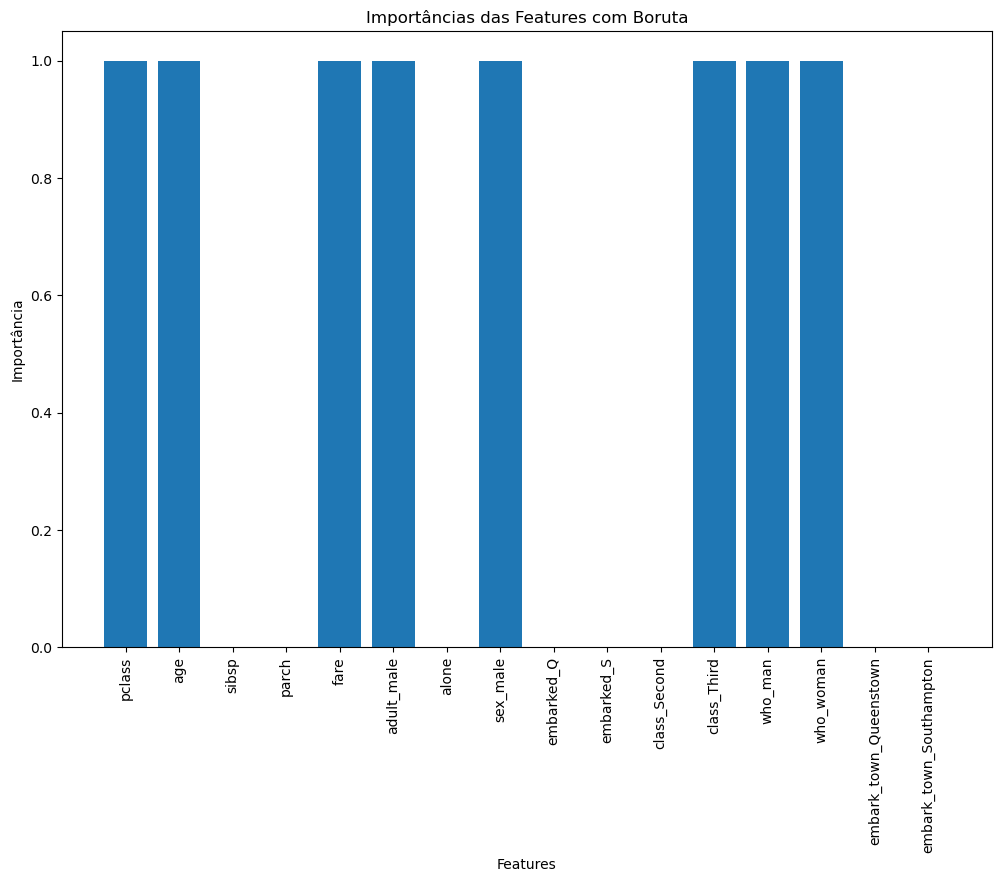

In [17]:
plt.figure(figsize=(12, 8))
plt.bar(X.columns, boruta.support_.astype(int))

plt.title('Importâncias das Features com Boruta')
plt.xlabel('Features')
plt.ylabel('Importância')
plt.xticks(rotation=90)
plt.show()

Neste gráfico de barras, as features marcadas com 1 são as consideradas importantes pelo Boruta, enquanto as marcadas com 0 não são consideradas importantes.

O algoritmo Boruta é uma abordagem de seleção de características utilizada para encontrar as características mais importantes (relevantes) em um conjunto de dados, particularmente quando utilizado com modelos baseados em árvores, como Random Forest. Foi desenvolvido com a intenção de trabalhar com problemas de biologia, mas sua aplicação se estende a muitos domínios.

Aqui está uma visão geral de como o Boruta funciona:

Duplicação das Features (Shadow Features):

O primeiro passo do Boruta é criar cópias de todas as características no conjunto de dados. Essas cópias são chamadas de "shadow features".
Em seguida, ele embaralha aleatoriamente os valores dentro de cada shadow feature, destruindo qualquer relação que eles possam ter com a variável alvo.
Treinar um Classificador:

O Boruta então treina um classificador (geralmente uma Random Forest, devido à sua habilidade de avaliar a importância de características) no conjunto de dados original estendido, que inclui tanto as características originais quanto suas shadow features embaralhadas.
O classificador, ao ser treinado, fornece um grau de importância para cada característica.
Comparação de Importância:

Depois que o classificador é treinado, o Boruta compara a importância das características reais com a mais importante das shadow features.
Características originais que têm uma importância consistentemente mais alta do que a shadow feature mais importante são consideradas relevantes e são "confirmadas" pelo Boruta.
Características que são consistentemente menos importantes do que as shadow features são consideradas irrelevantes e são "rejeitadas" pelo Boruta.
Características que às vezes são mais importantes e às vezes menos importantes do que as shadow features permanecem "não decididas".
Iterações:

O Boruta repete o processo várias vezes, a cada vez decidindo mais sobre quais características são importantes e quais não são, até que todas as características sejam confirmadas ou rejeitadas ou até que um número pré-definido de iterações seja alcançado.
Resultado Final:

Ao final das iterações, o Boruta fornece uma lista das características que ele considera relevantes (importantes) para prever a variável alvo.
Por que Boruta é útil?

A abordagem do Boruta é poderosa porque:

Ela é rigorosa, repetindo o processo muitas vezes para ter certeza sobre a importância das características.
Em vez de confiar apenas na importância relativa das características em si, ela compara a importância das características reais com características "fictícias" (shadow features). Isso dá um contexto para decidir se uma característica é genuinamente relevante ou se sua importância pode ser simplesmente devido ao acaso.
Essa metodologia ajuda a distinguir características que são verdadeiramente relevantes das que apenas parecem importantes devido ao ruído nos dados.